C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

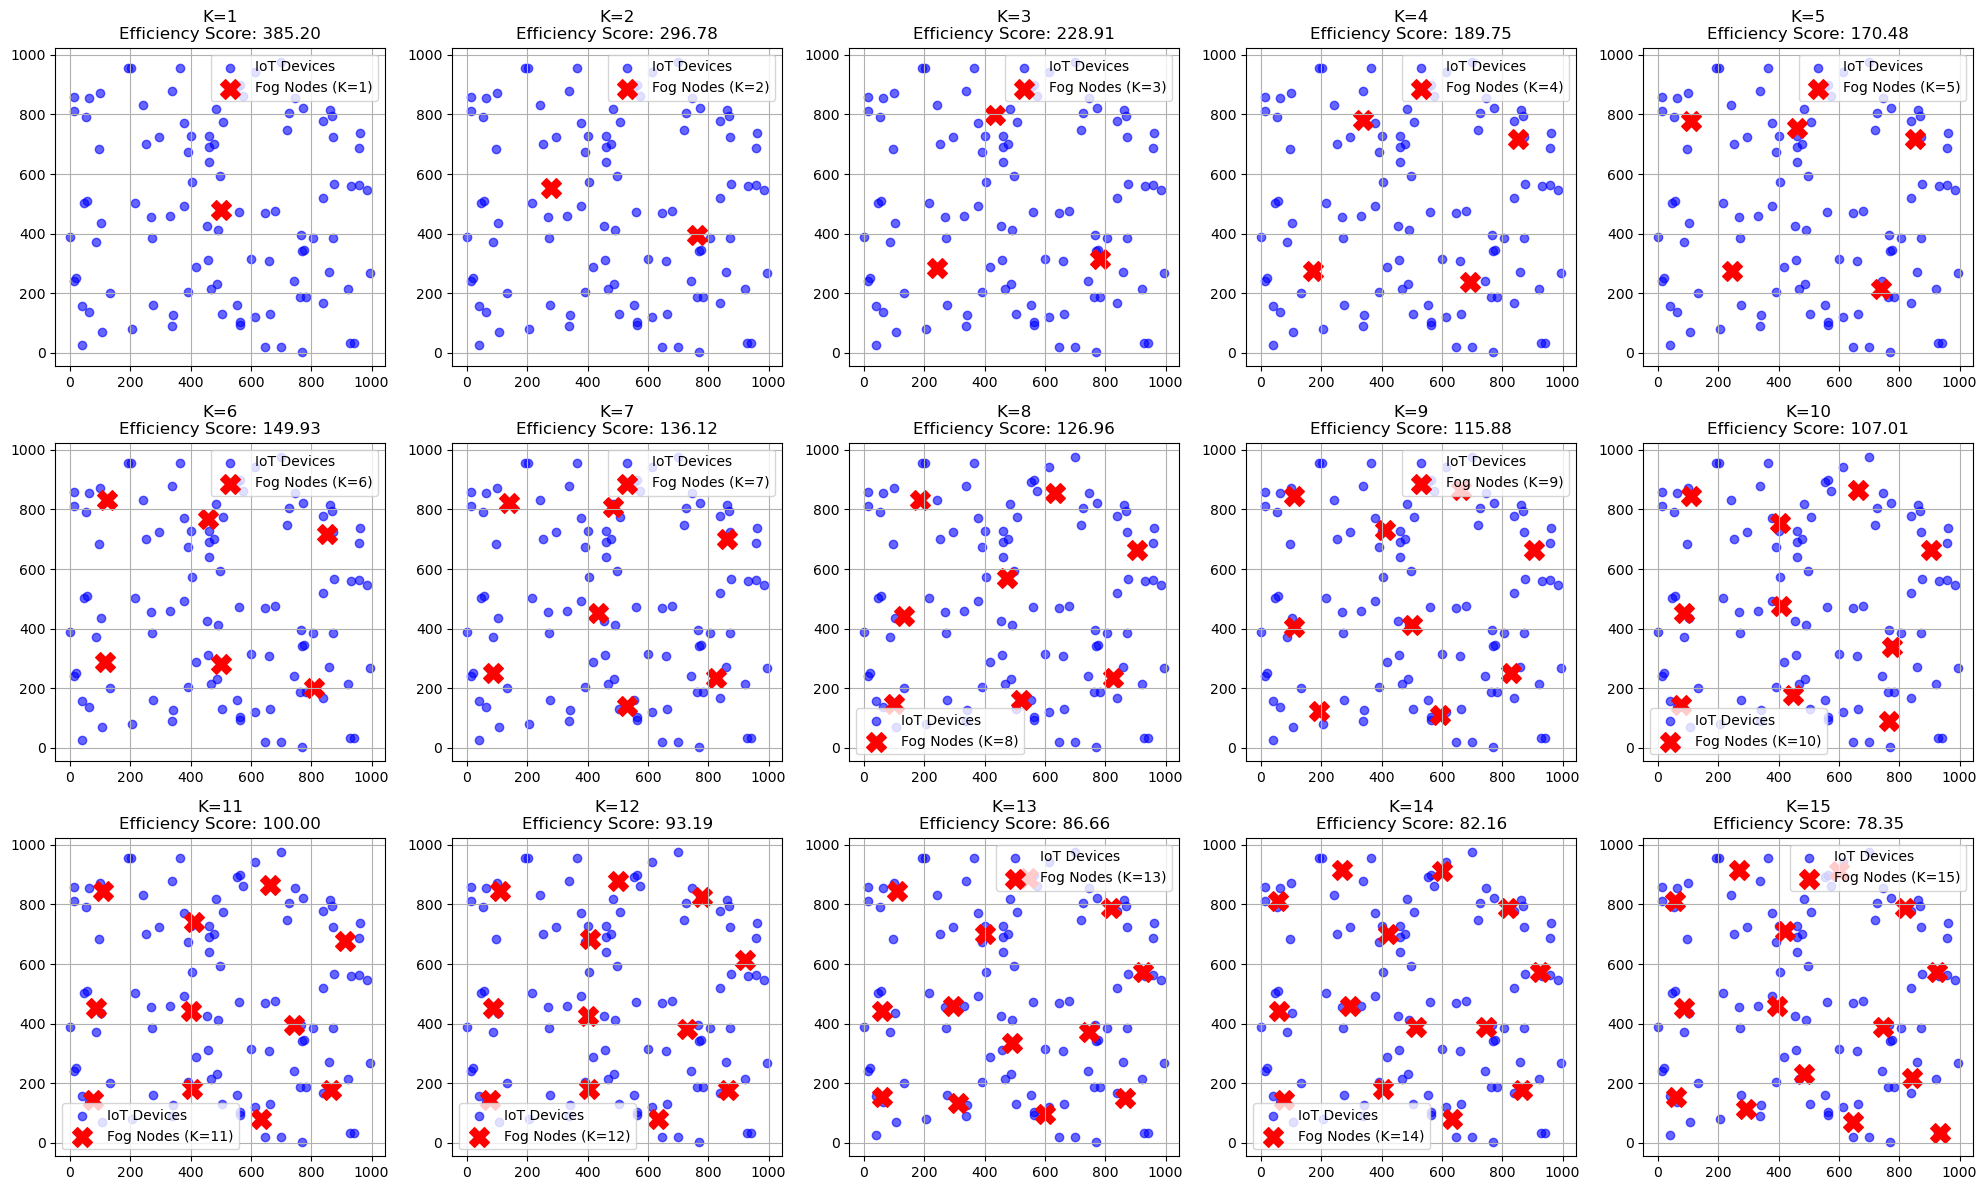

📍 K=1 | 🔴 Efficiency Score: 385.20
📍 K=2 | 🔴 Efficiency Score: 296.78
📍 K=3 | 🔴 Efficiency Score: 228.91
📍 K=4 | 🔴 Efficiency Score: 189.75
📍 K=5 | 🔴 Efficiency Score: 170.48
📍 K=6 | 🔴 Efficiency Score: 149.93
📍 K=7 | 🔴 Efficiency Score: 136.12
📍 K=8 | 🔴 Efficiency Score: 126.96
📍 K=9 | 🔴 Efficiency Score: 115.88
📍 K=10 | 🔴 Efficiency Score: 107.01
📍 K=11 | 🔴 Efficiency Score: 100.00
📍 K=12 | 🔴 Efficiency Score: 93.19
📍 K=13 | 🔴 Efficiency Score: 86.66
📍 K=14 | 🔴 Efficiency Score: 82.16
📍 K=15 | 🔴 Efficiency Score: 78.35


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set seed for reproducibility
np.random.seed(42)

# Parameters
num_iot_devices = 100
area_size = 1000  # 1 km² (1000m x 1000m)
k_values = list(range(1, 16))  # K values from 1 to 15

# Generate IoT device locations
iot_devices = np.random.randint(0, area_size, size=(num_iot_devices, 2))

# Function to calculate efficiency score (Average Distance)
def calculate_efficiency(iot_devices, fog_nodes):
    distances = cdist(iot_devices, fog_nodes, metric='euclidean')
    min_distances = np.min(distances, axis=1)  # Get the closest fog node for each IoT device
    avg_distance = np.mean(min_distances)  # Lower distance = better efficiency
    return avg_distance

# Store efficiency scores for different K values
efficiency_scores = []

# Plot results
fig, axes = plt.subplots(3, 5, figsize=(20, 12))

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(iot_devices)
    fog_nodes = kmeans.cluster_centers_
    
    efficiency_score = calculate_efficiency(iot_devices, fog_nodes)
    efficiency_scores.append((k, efficiency_score))
    
    # Plot clustering
    row, col = divmod(idx, 5)
    axes[row, col].scatter(iot_devices[:, 0], iot_devices[:, 1], c='blue', label='IoT Devices', alpha=0.6)
    axes[row, col].scatter(fog_nodes[:, 0], fog_nodes[:, 1], c='red', marker='X', s=200, label=f'Fog Nodes (K={k})')
    axes[row, col].set_title(f"K={k}\nEfficiency Score: {efficiency_score:.2f}")
    axes[row, col].legend()
    axes[row, col].grid()

plt.tight_layout()
plt.show()

# Print efficiency scores
for k, score in efficiency_scores:
    print(f"📍 K={k} | 🔴 Efficiency Score: {score:.2f}")


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Parameters
num_devices = 100  # 100 IoT devices
area_size = 1000   # 1km x 1km area

# Generate IoT device locations
iot_devices = np.random.randint(0, area_size, size=(num_devices, 2))

# Store silhouette scores for different k values
silhouette_scores = []
k_values = range(2, 16)  # Start from 2 to avoid single cluster issue

# Compute Silhouette Score for different k (fog nodes)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(iot_devices)
    score = silhouette_score(iot_devices, cluster_labels)
    silhouette_scores.append(score)
    print(f'For k={k}, Silhouette Score = {score:.4f}')

# Find optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of fog nodes based on Silhouette Score: {optimal_k}')


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

For k=2, Silhouette Score = 0.3797
For k=3, Silhouette Score = 0.4339
For k=4, Silhouette Score = 0.4181
For k=5, Silhouette Score = 0.4004
For k=6, Silhouette Score = 0.4106
For k=7, Silhouette Score = 0.3810
For k=8, Silhouette Score = 0.3734
For k=9, Silhouette Score = 0.3732
For k=10, Silhouette Score = 0.3989


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

For k=11, Silhouette Score = 0.3829
For k=12, Silhouette Score = 0.4066
For k=13, Silhouette Score = 0.4227
For k=14, Silhouette Score = 0.4345


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

For k=15, Silhouette Score = 0.4438
Optimal number of fog nodes based on Silhouette Score: 15


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi


📊 Efficiency Scores for Different K Values:
📍 K=1 | 🔴 Efficiency Score: 385.20
📍 K=2 | 🔴 Efficiency Score: 296.78
📍 K=3 | 🔴 Efficiency Score: 228.91
📍 K=4 | 🔴 Efficiency Score: 189.75
📍 K=5 | 🔴 Efficiency Score: 170.48
📍 K=6 | 🔴 Efficiency Score: 149.93
📍 K=7 | 🔴 Efficiency Score: 136.12
📍 K=8 | 🔴 Efficiency Score: 126.96
📍 K=9 | 🔴 Efficiency Score: 115.88
📍 K=10 | 🔴 Efficiency Score: 107.01


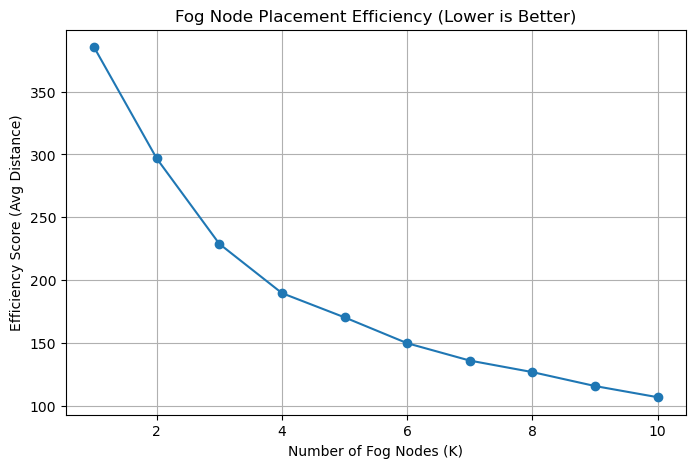

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set seed for reproducibility
np.random.seed(42)

# Parameters
num_iot_devices = 100
area_size = 1000  # 1 km² (1000m x 1000m)
k_values = range(1, 11)  # K from 1 to 10

# Generate IoT device locations
iot_devices = np.random.randint(0, area_size, size=(num_iot_devices, 2))

# Function to calculate efficiency score (Average Distance)
def calculate_efficiency(iot_devices, fog_nodes):
    distances = cdist(iot_devices, fog_nodes, metric='euclidean')
    min_distances = np.min(distances, axis=1)  # Get the closest fog node for each IoT device
    avg_distance = np.mean(min_distances)  # Lower distance = better efficiency
    return avg_distance

# Store efficiency scores for different K values
efficiency_scores = []

# Run K-Means clustering for K = 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(iot_devices)
    fog_nodes = kmeans.cluster_centers_
    
    efficiency_score = calculate_efficiency(iot_devices, fog_nodes)
    efficiency_scores.append((k, efficiency_score))

# Print efficiency scores
print("\n📊 Efficiency Scores for Different K Values:")
for k, score in efficiency_scores:
    print(f"📍 K={k} | 🔴 Efficiency Score: {score:.2f}")

# Plot efficiency scores
plt.figure(figsize=(8, 5))
k_values_list, scores_list = zip(*efficiency_scores)
plt.plot(k_values_list, scores_list, marker='o', linestyle='-')
plt.xlabel("Number of Fog Nodes (K)")
plt.ylabel("Efficiency Score (Avg Distance)")
plt.title("Fog Node Placement Efficiency (Lower is Better)")
plt.grid()
plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

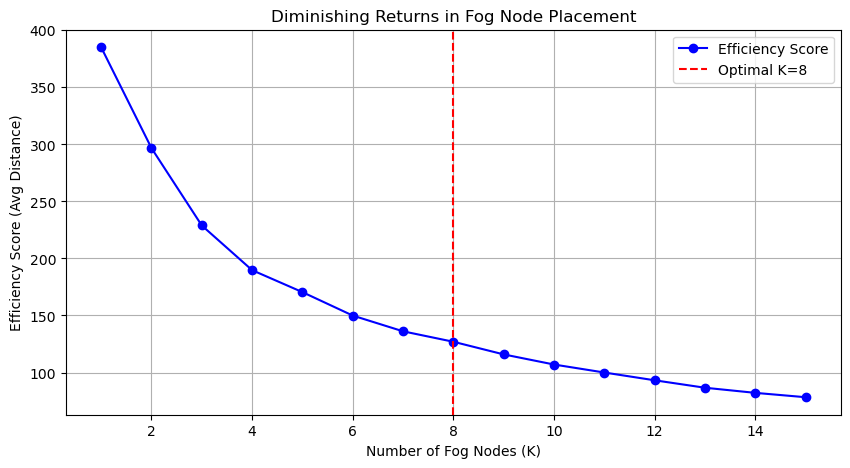

📍 K=1 | 🔴 Efficiency Score: 385.20
📍 K=2 | 🔴 Efficiency Score: 296.78
📍 K=3 | 🔴 Efficiency Score: 228.91
📍 K=4 | 🔴 Efficiency Score: 189.75
📍 K=5 | 🔴 Efficiency Score: 170.48
📍 K=6 | 🔴 Efficiency Score: 149.93
📍 K=7 | 🔴 Efficiency Score: 136.12
📍 K=8 | 🔴 Efficiency Score: 126.96
📍 K=9 | 🔴 Efficiency Score: 115.88
📍 K=10 | 🔴 Efficiency Score: 107.01
📍 K=11 | 🔴 Efficiency Score: 100.00
📍 K=12 | 🔴 Efficiency Score: 93.19
📍 K=13 | 🔴 Efficiency Score: 86.66
📍 K=14 | 🔴 Efficiency Score: 82.16
📍 K=15 | 🔴 Efficiency Score: 78.35


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set seed for reproducibility
np.random.seed(42)

# Parameters
num_iot_devices = 100
area_size = 1000  # 1 km² (1000m x 1000m)
k_values = list(range(1, 16))  # K values from 1 to 15

# Generate IoT device locations
iot_devices = np.random.randint(0, area_size, size=(num_iot_devices, 2))

# Function to calculate efficiency score (Average Distance)
def calculate_efficiency(iot_devices, fog_nodes):
    distances = cdist(iot_devices, fog_nodes, metric='euclidean')
    min_distances = np.min(distances, axis=1)  # Get the closest fog node for each IoT device
    avg_distance = np.mean(min_distances)  # Lower distance = better efficiency
    return avg_distance

# Store efficiency scores for different K values
efficiency_scores = []

# Run K-Means for different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(iot_devices)
    fog_nodes = kmeans.cluster_centers_
    
    efficiency_score = calculate_efficiency(iot_devices, fog_nodes)
    efficiency_scores.append((k, efficiency_score))

# Convert results into arrays for plotting
k_vals = np.array([k for k, _ in efficiency_scores])
scores = np.array([score for _, score in efficiency_scores])

# Plot Efficiency Score vs. K (to show diminishing returns)
plt.figure(figsize=(10, 5))
plt.plot(k_vals, scores, marker='o', linestyle='-', color='b', label="Efficiency Score")

# Mark the point where diminishing returns start
optimal_k = np.argmin(np.diff(scores, 2)) + 2  # Find the elbow point
plt.axvline(optimal_k, color='r', linestyle='--', label=f"Optimal K={optimal_k}")

plt.xlabel("Number of Fog Nodes (K)")
plt.ylabel("Efficiency Score (Avg Distance)")
plt.title("Diminishing Returns in Fog Node Placement")
plt.legend()
plt.grid()
plt.show()

# Print efficiency scores
for k, score in efficiency_scores:
    print(f"📍 K={k} | 🔴 Efficiency Score: {score:.2f}")
